## Blood Donation Analysis

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [80]:
train=pd.read_csv("datasets_13390_18127_blood-train.csv")
test=pd.read_csv("datasets_13390_18127_blood-test.csv")

In [81]:
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [82]:
test.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [83]:
#Printing the train and test size

print(train.shape)
print(test.shape)

(576, 6)
(200, 5)


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   200 non-null    int64
 1   Months since Last Donation   200 non-null    int64
 2   Number of Donations          200 non-null    int64
 3   Total Volume Donated (c.c.)  200 non-null    int64
 4   Months since First Donation  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [86]:
train.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [87]:
test.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,200.000000,200.00000,200.000000,200.000000,200.000000
mean,374.565000,9.49500,5.935000,1483.750000,35.475000
std,211.138231,7.61907,6.125224,1531.305955,25.111197
min,1.000000,0.00000,1.000000,250.000000,2.000000
25%,198.250000,4.00000,2.000000,500.000000,14.000000
50%,377.500000,7.00000,4.000000,1000.000000,31.000000
75%,537.000000,14.00000,8.000000,2000.000000,52.000000
max,745.000000,40.00000,41.000000,10250.000000,98.000000


In [88]:
##Counting the number of people who donated and not donated

train['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [89]:
#Storing dependent variable in Y

Y=train.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [90]:
#Removing Unnamed: 0 columns
old_train=train
train=train.iloc[:,1:5]
train.head()


,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [91]:
test=test.iloc[:,1:5]
test.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,12,3000,52
1,21,7,1750,38
2,4,1,250,4
3,11,11,2750,38
4,4,12,3000,34


In [92]:
df=pd.merge(train,test)
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [93]:
#Setting the independent variable and dependent variable
X=df
X.head()


,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


## Data Exploration

In [94]:
# Statistics of the data
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


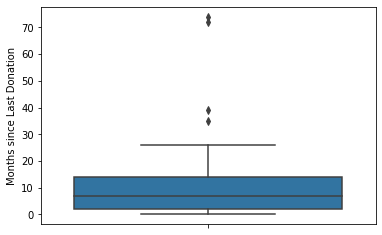

In [95]:
#Boxplot for Months since Last Donation
sns.boxplot(y='Months since Last Donation',data=old_train)

We see from the above boxplot that the maximum people have donated blood in nearby 10 months.

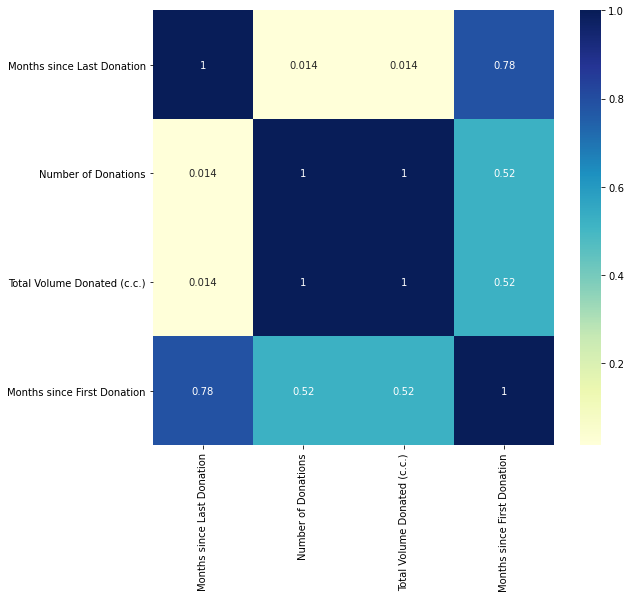

In [96]:
#Correlation between all variables [Checking how different variable are related]
plt.figure(figsize=(9,8))
sns.heatmap(X.corr(),annot=True, cmap ="YlGnBu")

In [97]:
#Printing all unique value for Month Since Last donation

train['Months since Last Donation'].unique()


array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72], dtype=int64)

## Feature Engineering

Volume donated is also a good feature to know wether the donor will donate or not.

In [98]:
#Creating new variable for calculating how many times a person have donated

X['Donating for']=X['Months since First Donation']-X['Months since Last Donation']
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donating for
0,2,2,500,4,2
1,2,2,500,4,2
2,2,2,500,4,2
3,2,2,500,4,2
4,2,2,500,4,2


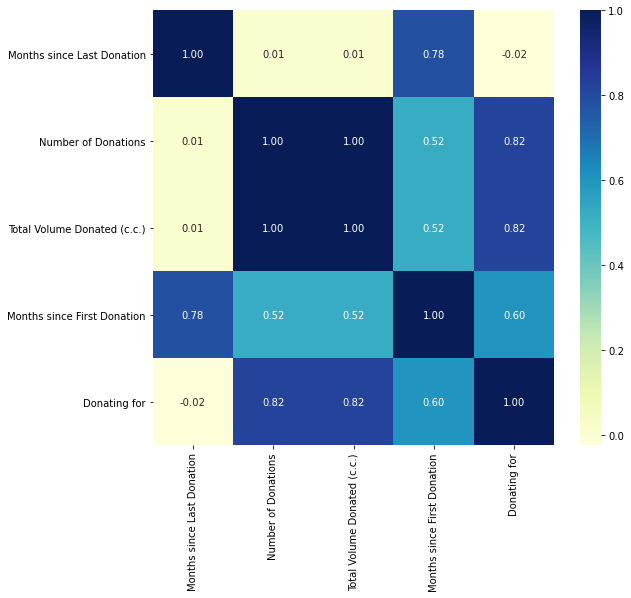

In [99]:
#Correlation between all variables
plt.figure(figsize=(9,8))
sns.heatmap(X.corr(),annot=True,cmap="YlGnBu",fmt = ".2f")

Since Total Volume Donated (c.c.) have the very high correlation with other variables so we are dropping the variable.

In [100]:
#Dropping the unnecessary column

X.drop('Total Volume Donated (c.c.)',axis=1,inplace=True)

In [101]:
X.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donating for
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,4,2
4,2,2,4,2


In [102]:
#Shape of independent variable
X.shape

(810, 4)

# Feature Transformation

In [103]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

#Fitting and transforming data

X=scale.fit_transform(X)

In [104]:
train=X[:576]
test=X[576:]

In [105]:
Y=Y[:576]
Y.shape

(576,)

Model Building

In [117]:
#Splitting into train and test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train,Y,test_size=0.2,random_state=0)

# Logistic regression

In [125]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(random_state=7)
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
#Predicting on the test data

pred=logreg.predict(X_test)

In [127]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
accuracy_score(pred,Y_test)

0.6982758620689655

In [128]:
#Printing the roc_auc_score
roc_auc_score(pred,Y_test)

0.6008771929824561

## Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [132]:
#Predicting the test data result
pred=rfc.predict(X_test)

In [133]:
#Printing the confusion matrix
confusion_matrix(pred,Y_test)

array([[79, 27],
       [ 2,  8]], dtype=int64)

In [135]:
accuracy_score(pred, Y_test)

0.75

In [136]:
#Printingthe roc auc score
roc_auc_score(pred,Y_test)

0.7726415094339623

## Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=3, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [139]:
#Predicting the test data
pred=dtc.predict(X_test)

In [140]:
accuracy_score(pred, Y_test)

0.7672413793103449

In [141]:
#printing the confusion matrix
confusion_matrix(pred,Y_test)

array([[78, 24],
       [ 3, 11]], dtype=int64)

In [142]:
#Printing accuracy score
accuracy_score(pred,Y_test)

0.7672413793103449

In [143]:
#Printing roc auc score
roc_auc_score(pred,Y_test)

0.7752100840336134